In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import os
import re

In [13]:
rootpath = '/home/cjm/disk1/research/DG4FL'
linestyles = ['-', ':', '--', '-.']
colors = ['black', 'royalblue', 'green', 'darkorange', 'lightcoral', 'darkviolet']

result_path = rootpath + "/logs/pacs_art_adain/"
data = pd.read_excel(result_path+"fed_pacs.xlsx", 
                    usecols=['jig_weight', 'total_wk_iters',
                            'a_iter', 'Train_Class_Acc', 'Train_Jig_Acc',
                            'Val_Class_Acc_L', 'Val_Jig_Acc_L',
                        #     'Val_Class_Acc_G', 'Val_Jig_Acc_G',
                            'Test_Class_Acc', 'Test_Jig_Acc'])

In [15]:
xlabel = 'a_iter'
ylabels = ['Val_Class_Acc_G', 'Test_Class_Acc', 'Test_Jig_Acc']
fig_titles = ['Classification Accuracy (Source Domain)', 
                'Classification Accuracy (Unknown Domain)',
                'Jigsaw Accuracy (Unknown Domain)'] # global model
# 'Classification accuracy (source domain, local model)' 'Val_Class_Acc_L',


'''part 1'''
for i, ylabel in enumerate(ylabels):
    fig = plt.figure(figsize=(6, 6))
    data = data.loc[data['total_wk_iters'] == 1]

    # naive FedJigen (no RSC)
    data_pacs = data.loc[data['mode'] == 'FedBN-Jigen'].loc[data['jig_weight'] == 0.7]
    # data_1 = data.loc[data['jig_weight'] == 0.7]
    x_pacs = data_pacs[xlabel].values.tolist()
    x_pacs = np.array(x_pacs)
    y_pacs = data_pacs[ylabel].values.tolist()
    y_pacs = np.array(y_pacs)
    if type(y_pacs[0]) == str:
        for item in range(len(y_pacs)):
            # tensor(0.5435, device='cuda:0')
            y_pacs[item] = y_pacs[item].replace('tensor(', '')
            y_pacs[item] = y_pacs[item].replace(", device='cuda:0')", "")
            y_pacs[item] = float(y_pacs[item])
        print(y_pacs)
    plt.plot(x_pacs, y_pacs, label='FedJigen', linewidth=1.5, color=colors[0])

    # FedBN
    data_bn = data.loc[data['mode'] == 'FedBN-Jigen'].loc[data['jig_weight'] == 0.]
    x_bn = data_bn[xlabel].values.tolist()
    x_bn = np.array(x_bn)
    y_bn = data_bn[ylabel].values.tolist()
    y_bn = np.array(y_bn)
    plt.plot(x_bn, y_bn, label='FedBN', linewidth=1.5, color=colors[1])

    # naive FedAvg+Jigen
    # data_pacs_3 = 
    # data_naive = data.loc[data['mode'] == 'FedBN-Jigen'].loc[data['jig_weight'] == 0.7]
    # x_pacs_3 = data_naive_2[xlabel].values.tolist()
    # x_pacs_3 = np.array(x_pacs_3)
    # y_pacs_3 = data_pacs_3[ylabel].values.tolist()
    # y_pacs_3 = np.array(y_pacs_3)
    # plt.plot(x_pacs_3, y_pacs_3, label='NaiveJigen', linewidth=1.5, color=colors[2])

    # # FedJigen (with RSC) 
    # data_rsc = data.loc[data['mode'] == 'FedJigen+RSC'].loc[data['jig_weight'] == 0.7]
    # x_rsc = data_rsc[xlabel].values.tolist()
    # x_rsc = np.array(x_rsc)
    # y_rsc = data_rsc[ylabel].values.tolist()
    # y_rsc = np.array(y_rsc)
    # plt.plot(x_rsc, y_rsc, label='FedJigen', linewidth=1.5, color=colors[3])

    # central Jigen
    data_jigen = data.loc[data['mode'] == 'Jigen'].loc[data['jig_weight'] == 0.7]
    x_jigen = data_jigen[xlabel].values.tolist()
    x_jigen = np.array(x_jigen)
    y_jigen = data_jigen[ylabel].values.tolist()
    y_jigen = np.array(y_jigen)
    plt.plot(x_jigen, y_jigen, label='CentralJigen', linewidth=1.5, color=colors[4])

   
    plt.xlabel('Global Iterations', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.xlim(0, 200) 
    if i == 0:
        plt.ylim(0.5, 1.0)
    elif i == 1:
        plt.ylim(0.3, 1.0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(fig_titles[i], fontsize=16)
    plt.tight_layout()
    plt.savefig(rootpath + '/logs/pacs/benchmark-'+ylabel+'.eps', format='eps')
    plt.show()

KeyError: 'mode'

In [4]:
'''part 2: vary worker iterations - global iteraion'''
ylabel = 'Test_Class_Acc'
fig = plt.figure(figsize=(8, 8))
data_pacs = data.loc[data['mode'] == 'FedBN-Jigen']
data_pacs = data_pacs.loc[data_pacs['jig_weight'] == 0.7]

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 1]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=1', linewidth=1.5, color=colors[0])

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 5]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=5', linewidth=1.5, color=colors[1])

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 10]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=10', linewidth=1.5, color=colors[2])

plt.xlabel('Global Iterations', fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.xlim(0, 200) 
plt.ylim(0, 1.0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Classification Accuracy (Unknown Domain)', fontsize=16)
plt.tight_layout()
plt.savefig(rootpath + '/logs/pacs/wk_iter.eps', format='eps')
plt.show()


NameError: name 'data' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


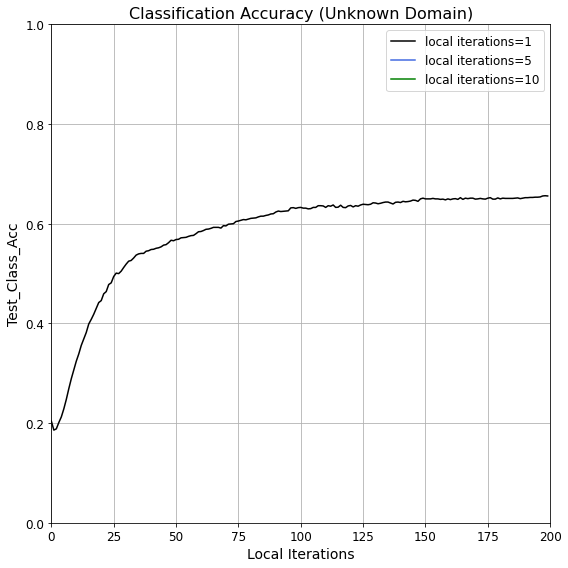

In [47]:
'''part 2: vary worker iterations - local iteraion'''
ylabel = 'Test_Class_Acc'
fig = plt.figure(figsize=(8, 8))
data_pacs = data.loc[data['mode'] == 'FedBN-Jigen']
data_pacs = data_pacs.loc[data_pacs['jig_weight'] == 0.7]

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 1]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs) * 1
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=1', linewidth=1.5, color=colors[0])

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 5]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs) * 5
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=5', linewidth=1.5, color=colors[1])

data_one = data_pacs.loc[data_pacs['total_wk_iters'] == 10]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs) * 10
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='local iterations=10', linewidth=1.5, color=colors[2])

plt.xlabel('Local Iterations', fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.xlim(0, 200) 
plt.ylim(0, 1.0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Classification Accuracy (Unknown Domain)', fontsize=16)
plt.tight_layout()
plt.savefig(rootpath + '/logs/pacs/wk_iter_local_iteration.eps', format='eps')
plt.show()


In [5]:
'''part 3: vary weight'''
xlabel = 'a_iter'
ylabel = 'Test_Class_Acc'
fig = plt.figure(figsize=(8, 8))
data_pacs = data.loc[data['mode'] == 'FedBN-Jigen'].loc[data['total_wk_iters'] == 1]
print(data_pacs.shape)

# data_one = data_pacs.loc[data_pacs['jig_weight'] == 0.1]
# x_pacs = data_one[xlabel].values.tolist()
# x_pacs = np.array(x_pacs)
# y_pacs = data_one[ylabel].values.tolist()
# y_pacs = np.array(y_pacs)
# plt.plot(x_pacs, y_pacs, label='Jigsaw weight=0.1', linewidth=1.5, color=colors[0])

print(data_pacs['jig_weight'].values)

data_one = data_pacs.loc[data_pacs['jig_weight'] == 0.3]
print(data_one.shape)
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='Jigsaw weight=0.3', linewidth=1.5, color=colors[1])

data_one = data_pacs.loc[data_pacs['jig_weight'] == 0.5]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='Jigsaw weight=0.5', linewidth=1.5, color=colors[2])

data_one = data_pacs.loc[data_pacs['jig_weight'] == 0.7]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='Jigsaw weight=0.7', linewidth=1.5, color=colors[3])

data_one = data_pacs.loc[data_pacs['jig_weight'] == 1.3]
x_pacs = data_one[xlabel].values.tolist()
x_pacs = np.array(x_pacs)
y_pacs = data_one[ylabel].values.tolist()
y_pacs = np.array(y_pacs)
plt.plot(x_pacs, y_pacs, label='Jigsaw weight=1.3', linewidth=1.5, color=colors[4])

plt.xlabel('Global Iterations', fontsize=14)
plt.ylabel('Asscuracy', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.xlim(0, 200) 
plt.ylim(0.4, 0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Classification Accuracy (Unknown Domain)', fontsize=16)
plt.tight_layout()
plt.savefig(rootpath + '/logs/pacs/weight.eps', format='eps')
plt.show()

NameError: name 'data' is not defined